In [3]:
import  pandas  as pd
import  numpy  as np
import  matplotlib.pyplot  as plt

# Module 2 Topic 2 Data Preperation

In [4]:
file = open('adult.data', 'r')
def chr_int(a):
    if a.isdigit(): return int(a)
    else: return 0

data = []
for line in file:
    data1 = line.split(', ')
    if len(data1) == 15:
        data.append([
            chr_int(data1[0]), data1[1],
            chr_int(data1[2]), data1[3],
            chr_int(data1[4]), data1[5],
            data1[6], data1[7], data1[8],
            data1[9], chr_int(data1[10]),
            chr_int(data1[11]),
            chr_int(data1[12]),
            data1[13], data1[14].strip()
        ])

data[0:2]

[[39,
  'State-gov',
  77516,
  'Bachelors',
  13,
  'Never-married',
  'Adm-clerical',
  'Not-in-family',
  'White',
  'Male',
  2174,
  0,
  40,
  'United-States',
  '<=50K'],
 [50,
  'Self-emp-not-inc',
  83311,
  'Bachelors',
  13,
  'Married-civ-spouse',
  'Exec-managerial',
  'Husband',
  'White',
  'Male',
  0,
  0,
  13,
  'United-States',
  '<=50K']]

# Worksheet 2

- What does the 'r' do in that first line?

This reads the file and does not allow it to be changed. It is a string.
- Describe the function chr_int in the second line

It looks for a string and print out a variable if their is a string.
- Try compiling this with 'data1 - line.split(',')' without that space. What happends?

The data will all be combined and not be separated by columns.

# Worksheet 3
- What might be the best data structure to place this data in?

Dataframe

In [5]:
# Turn data (which is currently an array) into a dataframe

adult = pd.DataFrame(
    data,
    columns=[
        'age', 'type-employer', 'final_weight',
        'education', 'education_num', 'marital',
        'occupation', 'relationship', 'race',
        'sex', 'capital_gain', 'capital_loss',
        'hr_per_week', 'country', 'income'
        
    ]
)
adult.head()

,age,type-employer,final_weight,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Worksheet 4

In the last cell we listed a bunch of column names, but the original data doesn't have any column names. How does python know how to associate a column name to its column?

For the row of the data in plain text it is ordered and the first row represents the first row of the data set.

# Worksheet 5
Print the first lines of the adult dataframe.

In [6]:
adult.head()

,age,type-employer,final_weight,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Recall the guiding research question
"Are men more likely than women to become high incomeearners" where high income earners are those who earn more than $50k/year.

This is asking is the proporting of men who earn above 50k higher, equal, or less than the proportion of all women who earn above 50k. This is different than asking if male ER doctors earn more than female ER doctors, e.g.

## We'll use this research question to inspire the creation of several sub-dataframes to make our analysis a bit easier.

Here are some examples:
- all men
- all women
- high income men
- high income women
- low income men
- low income women

In [7]:
men = adult[ adult['sex'] == 'Male' ]
women = adult[ adult['sex'] == 'Female' ]
men_high_income = adult[ (adult['sex'] == 'Male') & (adult['income'] == '>50K')]
women_high_income = adult[ (adult['sex'] == 'Female') & (adult['income'] == '>50K')]
men_low_income = adult[ (adult['sex'] == 'Male') & (adult['income'] == '<=50K')]
women_low_income = adult[ (adult['sex'] == 'Female') & (adult['income'] == '<=50K')]

In [8]:
men

,age,type-employer,final_weight,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
13,32,Private,205019,Assoc-acdm,12,Never-married,Sales,Not-in-family,Black,Male,0,0,50,United-States,<=50K
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K


In [9]:
women

,age,type-employer,final_weight,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
12,23,Private,122272,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,<=50K
19,43,Self-emp-not-inc,292175,Masters,14,Divorced,Exec-managerial,Unmarried,White,Female,0,0,45,United-States,>50K
21,54,Private,302146,HS-grad,9,Separated,Other-service,Unmarried,Black,Female,0,0,20,United-States,<=50K
24,59,Private,109015,HS-grad,9,Divorced,Tech-support,Unmarried,White,Female,0,0,40,United-States,<=50K
37,19,Private,544091,HS-grad,9,Married-AF-spouse,Adm-clerical,Wife,White,Female,0,0,25,United-States,<=50K
43,49,Private,94638,HS-grad,9,Separated,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [10]:
men_high_income

,age,type-employer,final_weight,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K
20,40,Private,193524,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K
25,56,Local-gov,216851,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,>50K
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
38,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,?,>50K
45,57,Federal-gov,337895,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Black,Male,0,0,40,United-States,>50K


In [11]:
women_high_income

,age,type-employer,final_weight,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
19,43,Self-emp-not-inc,292175,Masters,14,Divorced,Exec-managerial,Unmarried,White,Female,0,0,45,United-States,>50K
52,47,Private,51835,Prof-school,15,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,1902,60,Honduras,>50K
67,53,Private,169846,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,>50K
84,44,Private,343591,HS-grad,9,Divorced,Craft-repair,Not-in-family,White,Female,14344,0,40,United-States,>50K
89,43,Federal-gov,410867,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,50,United-States,>50K
125,47,Private,287828,Bachelors,13,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,>50K
143,45,Private,196584,Assoc-voc,11,Never-married,Prof-specialty,Not-in-family,White,Female,0,1564,40,United-States,>50K
197,40,Federal-gov,56795,Masters,14,Never-married,Exec-managerial,Not-in-family,White,Female,14084,0,55,United-States,>50K
208,58,Self-emp-inc,210563,HS-grad,9,Married-civ-spouse,Sales,Wife,White,Female,15024,0,35,United-States,>50K


In [12]:
men_low_income 

,age,type-employer,final_weight,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
13,32,Private,205019,Assoc-acdm,12,Never-married,Sales,Not-in-family,Black,Male,0,0,50,United-States,<=50K
15,34,Private,245487,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,0,0,45,Mexico,<=50K
16,25,Self-emp-not-inc,176756,HS-grad,9,Never-married,Farming-fishing,Own-child,White,Male,0,0,35,United-States,<=50K
17,32,Private,186824,HS-grad,9,Never-married,Machine-op-inspct,Unmarried,White,Male,0,0,40,United-States,<=50K
18,38,Private,28887,11th,7,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,United-States,<=50K
22,35,Federal-gov,76845,9th,5,Married-civ-spouse,Farming-fishing,Husband,Black,Male,0,0,40,United-States,<=50K


In [13]:
women_low_income

,age,type-employer,final_weight,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
12,23,Private,122272,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,<=50K
21,54,Private,302146,HS-grad,9,Separated,Other-service,Unmarried,Black,Female,0,0,20,United-States,<=50K
24,59,Private,109015,HS-grad,9,Divorced,Tech-support,Unmarried,White,Female,0,0,40,United-States,<=50K
37,19,Private,544091,HS-grad,9,Married-AF-spouse,Adm-clerical,Wife,White,Female,0,0,25,United-States,<=50K
43,49,Private,94638,HS-grad,9,Separated,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
47,44,Private,128354,Masters,14,Divorced,Exec-managerial,Unmarried,White,Female,0,0,40,United-States,<=50K
50,25,Private,32275,Some-college,10,Married-civ-spouse,Exec-managerial,Wife,Other,Female,0,0,40,United-States,<=50K


# M2 Worksheet 1
Numerical- age, fnlwgt, capital_gain, capital_loss, hr_per_week, income

Categorical- type employer, education, marital, occupation, relationship, race, sex,country

Ambiguous- education_num

# Module 2 Topic 3 -- EDA Basics

One of the tasks is to find out how much and what kind of data you have. One way of finding out "how much"  is the follow

In [14]:
adult.shape
# This returns the number of rows and the number of columns

(32561, 15)

Notice there are 15 columns. These are alternatively called
- column
- variable
- feature
- coveriate

# Worksheet 2
Find the size of those dataframes: men, women, men_high_income, etc...

In [15]:
men.shape

(21790, 15)

In [16]:
women.shape

(10771, 15)

In [17]:
men_high_income.shape

(6662, 15)

In [18]:
women_high_income.shape

(1179, 15)

In [19]:
men_low_income.shape

(15128, 15)

In [20]:
women_low_income.shape

(9592, 15)

Some questions to think about when preforming an EDA
* What are the features/variables/columns in this dataset?
* Are they numerical or categorical?
* Does the data seem sensible? Is it relevant?
* Does the data seem to be in the right scale? 0.000031 meters should be 31 micrometers
* Does it seem like there's a lot of missing data?
* Do you know what all the variables are? e.g. what is 'education_number' or 'fnlwgt'

# Module 2 Topic 4 -- Removing Outliers

Three ways to remove outliers:

1) Domain expertise... no statistic needed.

2) mean/standard deviation method

3) median/interquartilerange method

The idea for 2,3 is that we want to remove outliers that are too far from the center of our dataset.
Three questions we need answers for to do this:

1) What is the center of the data?

2) How do we measure distancein a data set?

3) How far is too far?

## The mean/standard deviaton method
This answers two of three questions

- Center of data = mean

- Unit of distance = Standard deviation

In [21]:
# the mean age of adults in our adult dataframe
adult['age'].mean()

38.58164675532078

## Worksheet 1

Find the mean age of men, women, high income men, high income women

In [22]:
print men['age'].mean()
print women['age'].mean()
print men_high_income['age'].mean()
print women_high_income['age'].mean()

39.4335474989
36.8582304336
44.6257880516
42.1255301103


In [23]:
# the variance of the age of adults
adult['age'].var()

186.06140024879625

In [24]:
# the standard deviation of the age of adults
adult['age'].std()

13.640432553581146

# Worksheet 2

In [25]:
print men['age'].var()
print women['age'].var()
print men_high_income['age'].var()
print women_high_income['age'].var()

178.773751745
196.383706395
109.945066749
109.413770411


In [26]:
print men['age'].std()
print women['age'].std()
print men_high_income['age'].std()
print women_high_income['age'].std()

13.3706301925
14.0136970994
10.4854693147
10.4601037476


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000041426D8>,
      dtype=object)

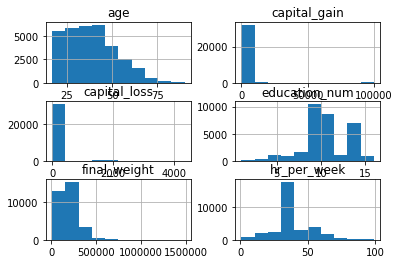

In [27]:
# a histogram for every numerical variable in a dataframe
adult.hist()

## Worksheet 3

How might I find out how to make my histogram printout bigger?

- Look up the histogram function online

## Worksheet 4

Make a histogram for all numerical variables in the men, women, high income men, and high income women dataframes.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B793C18>,
      dtype=object)

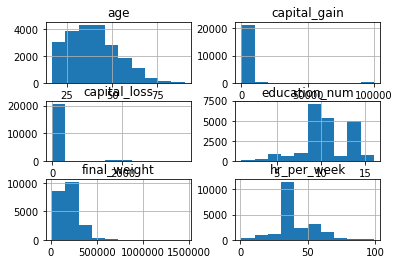

In [28]:
men.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D0941D0>,
      dtype=object)

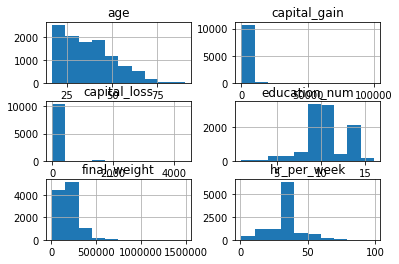

In [29]:
women.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D83C4E0>,
      dtype=object)

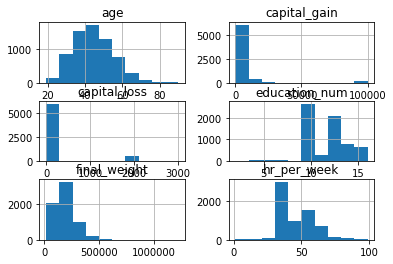

In [30]:
men_high_income.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000DF5B8D0>,
      dtype=object)

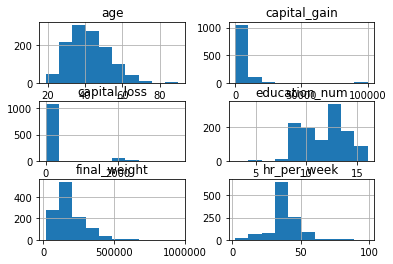

In [31]:
women_high_income.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000E421CC0>,
      dtype=object)

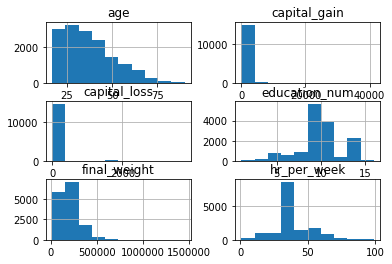

In [32]:
men_low_income.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000ECFCB00>,
      dtype=object)

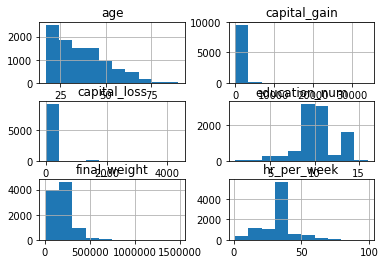

In [33]:
women_low_income.hist()

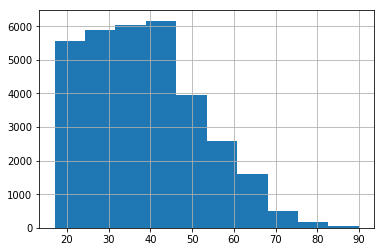

In [34]:
# make a histogram for a single column
adult['age'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000F392048>]],
      dtype=object)

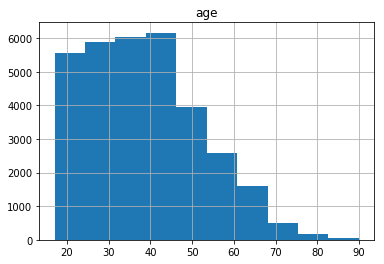

In [35]:
# make a histogram for a single column
adult.hist(column = 'age')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000F3A9C18>,
      dtype=object)

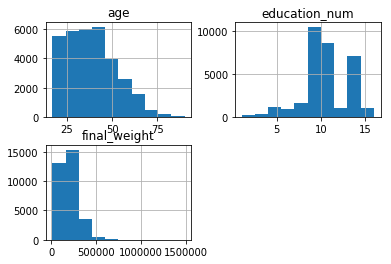

In [36]:
# make several histograms
adult.hist(column = ['age', 'final_weight', 'education_num'])

Some questions to ask
* Do any variables seem not useful or redundant?
* Is there better (wider/narrower) bin widths for histograms?
* Should we turn any of the numerical variables into categorical variables?
* Any unexpected distributions?
* Any immediately apparent outliers?

## Center and Distance -- Median and Interquartile Range (IQR)

Median is another kind of average, the measure that captures the middle data point (if odd number of data points) or the mean of the middle two data points (if even number of data points).

In [37]:
# computing the median
adult['age'].median()

37.0

## Worksheet 5

Find the median ages of the men, women, high income men and high income women.

In [38]:
print men['age'].median()
print women['age'].median()
print men_high_income['age'].median()
print women_high_income['age'].median()

38.0
35.0
44.0
41.0


## Quantiles

A quantile is a way to split up the dataset into equal sized pieces.

* Percentiles chop up data into 100 pieces
* Quartiles chop up data into 4 pieces
* Quintiles chop up data into 5 pieces

**example**
Consider the dataset {1,2,24,36,1345}
* 1 is the 0th percentile
* 2 is the 25th percentile or the 1st quartile
* 24 is the 50th percentile or the 2nd quartile

## Worksheet 6

What is another name for the 50th percentile?

ANS: Median

Quantile aren't always numbers in the datset, e.g.

The 50th percentile of the dataset {1,2} is 1.5. 
The 10th percentile of the data set {1,2} is 1.1. (We interpolate 10% of the way from 1 to 2)

In [39]:
# Computing quantiles in python
print adult['age'].quantile(0.1) # 10th percentile
print adult['age'].quantile(0.25) # 25th percentile or 1st quartile
print adult['age'].quantile(0.50) # 50h percentile or 2nd quartile

22.0
28.0
37.0


The interquartile range is our measure of distance between datapoints.

IQR = 3rd quartile - 1st quartile

## Worksheet 8

Define a function (using def) that measures the IQR and apply it to adult['age']

In [59]:
def IQR(x):
    return x.quantile(0.75) - x.quantile(0.25)

IQR(adult['age'])

20.0

# Vizualize median & IQR with boxplots

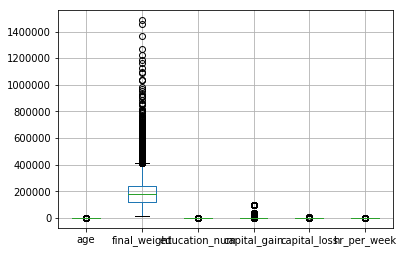

In [40]:
adult.boxplot()

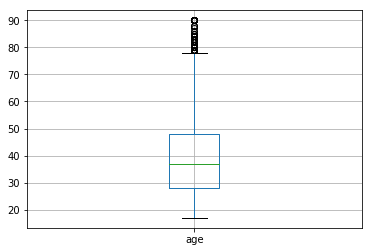

In [41]:
adult.boxplot(column = 'age')

### How far is far enough to be considered an outlier?

1) Consult an expert in the area in which your data lives

2) A technique specific for mean/standard deviation

3) A technique specific for the median/Iqr

## Consulting an expert

The expert should simply tell you where the cutoffs are for outliers.

In our adult dataset, we may consult an economist or expert in incomes. Suppose our expert says that we only want to consider incomes from people between 22 and 72 years of age.

Once we have these cutoffs, we'll want to remove any data from ages outside the range before commencing with our more riguous statistical analysis.

In [42]:
# create a copy of the datset as a backup
adult_original_data = adult

# count the total number of outlierrows at each outcome
print len( adult[ adult['age'] < 22] )
print len( adult[ adult['age'] > 72] )

# count the total number of outlier rows at each outcome for extremefor high income earners
print len( adult[ (adult['income'] == '>50K') & ( adult['age'] < 22 ) ] )
print len( adult[ (adult['income'] == '>50K') & ( adult['age'] > 72 ) ] )

3130
401
5
69


In [43]:
# create a new dataframe with the outliers dropped
adult_expert_outlier_drop = adult.drop(
    adult.index[
        (adult['age'] < 22) | (adult['age'] > 72)
    ]
)
adult_expert_outlier_drop

,age,type-employer,final_weight,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


## Drop outliers using mean and standard deviation

A purely applied statistical rule of thumb is that outliers are those datapoints that are more than 2 or 3 standard deviations from the mean.

In [44]:
# create syntactical sugar
age = adult['age']
income = adult['income']
age_mean = age.mean()
age_std = age.std()

# count the number of outliers we have
print len( adult[ age > age_mean + 2.5*age_std ] )
print len( adult[ age < age_mean - 2.5*age_std ] )

# count the number of outliers we have from high income earners
print len( adult[ (income == '>50K') & (age > age_mean + 2.5*age_std) ] )
print len( adult[ (income == '>50K') & (age < age_mean - 2.5*age_std) ] )

# drop these outliers
adult_mean_outlier_drop = adult.drop(
    adult.index[
        (age > age_mean + 2.5*age_std) | (age < age_mean - 2.5*age_std)
]
)

print age_mean - 2.5*age_std
print age_mean + 2.5*age_std

adult_mean_outlier_drop.head()


401
0
69
0
4.48056537137
72.6827281393


,age,type-employer,final_weight,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Removing outliers using the median and interquartile range

In this method, the rule of thumb is that any datapoint more than 1.5 Iqr's away from the median is considered an outlier

In [45]:
# create syntactical sugar
age = adult['age']
income = adult['income']
age_median = age.median()
age_iqr = age.quantile(0.75) - age.quantile(0.25)

# count the number of outliers we have
print len( adult[ age > age_median + 2.5*age_iqr ] )
print len( adult[ age < age_median - 2.5*age_iqr ] )

# count the number of outliers we have from high income earners
print len( adult[ (income == '>50K') & (age > age_median + 2.5*age_iqr) ] )
print len( adult[ (income == '>50K') & (age < age_median - 2.5*age_iqr) ] )

# drop these outliers
adult_median_outlier_drop = adult.drop(
    adult.index[
        (age > age_median + 2.5*age_iqr) | (age < age_median - 2.5*age_iqr)
]
)

print age_median - 2.5*age_iqr
print age_median + 2.5*age_iqr

adult_median_outlier_drop.head()

46
0
8
0
-13.0
87.0


,age,type-employer,final_weight,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Module 2 Topic 5 -- Exploratory Analysis

In [46]:
adult_eda = adult_expert_outlier_drop

adult_eda.head()

,age,type-employer,final_weight,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Measure of Centrallity and Spread
This is where we find the mean or medium for all numerical variables as well as standard deviation or interquartile range. We also like to depict them using histograms or boxplots.

## Worksheet 1
For the adult_edu dataframe, find the mean, standard deviation, median, and IQR for each numerical variable for men and women. Also, draw histograms and boxplots.

In [47]:
men_eda = adult_eda[ adult_eda['sex'] == 'Male' ]
women_eda = adult_eda[ adult_eda['sex'] == 'Female' ]
men_high_income_eda = adult_eda[ (adult_eda['sex'] == 'Male') & (adult_eda['income'] == '>50K')]
women_high_income_eda = adult_eda[ (adult_eda['sex'] == 'Female') & (adult_eda['income'] == '>50K')]
men_low_income_eda = adult_eda[ (adult_eda['sex'] == 'Male') & (adult_eda['income'] == '<=50K')]
women_low_income_eda = adult_eda[ (adult_eda['sex'] == 'Female') & (adult_eda['income'] == '<=50K')]

In [48]:
men_eda.mean()

age                  40.553517
final_weight     191100.812880
education_num        10.240461
capital_gain       1422.156252
capital_loss        104.940274
hr_per_week          43.490976
dtype: float64

## Measures of Symmetry

How symmetric is the data? We know that is it's center (the mean), so is the data symmetric about the mean or is it "skewed" to one direction?

Consider three simple datasets.

1) {1,2,3} is symmetric about the median, which is 2. This would have skew 0

2) {1,2,100} is not symmetric about the median, there is more weight to the right. We say this is skewed to the right.

3) {-100,2,3} is not symmetric about the median, there is more weight to the left. We say this is skewed to the left.

A rule of thumb for determining skewness

1) mean < median => skewed left

2) mean = median => no skew

3) mean > median => skewed right

There is an equation for skewness

$$ g_1 = \dfrac{1}{n-1} \dfrac{ \sum_i ( x_i - \bar{x} )^3 }{s^3} $$

There are many variants to this version of the skew. 


In [49]:
# compute skew of age
print adult_eda['age'].skew()

# mean and median age
print adult_eda['age'].mean()
print adult_eda['age'].median()

0.46794181414582703
40.116706855
39.0


## Worsheet 2

Compute the skew of the age for men, women, high income men, and high income women.

In [50]:
print men_eda['age'].skew()
print women_eda['age'].skew()
print men_high_income_eda['age'].skew()
print women_high_income_eda['age'].skew()

0.43641534933720055
0.5512599490866336
0.26939920786882
0.403152886883592


We can view skewness by observing the histogram of a variable.

39.1659919028
38.0


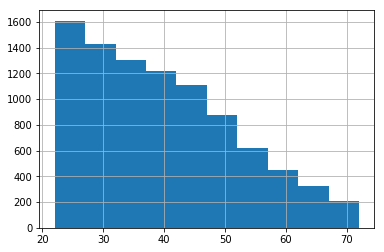

In [51]:
print women_eda['age'].mean()
print women_eda['age'].median()

women_eda['age'].hist()

In [52]:
# define a correlation matrix, gathers the correlation between all numberical variable of a data in a single matrix

adult_corr_matrix = adult_eda.corr()
print adult_corr_matrix

                    age  final_weight  education_num  capital_gain  \
age            1.000000     -0.073073      -0.039343      0.068705   
final_weight  -0.073073      1.000000      -0.039922      0.000340   
education_num -0.039343     -0.039922       1.000000      0.119634   
capital_gain   0.068705      0.000340       0.119634      1.000000   
capital_loss   0.048611     -0.009608       0.077492     -0.033809   
hr_per_week   -0.029636     -0.022346       0.106808      0.074542   

               capital_loss  hr_per_week  
age                0.048611    -0.029636  
final_weight      -0.009608    -0.022346  
education_num      0.077492     0.106808  
capital_gain      -0.033809     0.074542  
capital_loss       1.000000     0.050921  
hr_per_week        0.050921     1.000000  


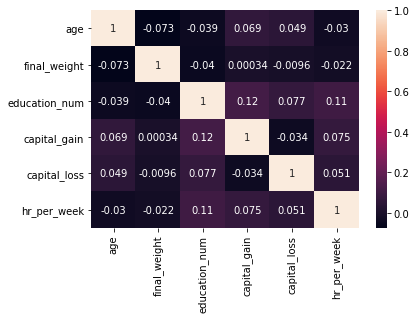

In [53]:
# import the seaborn library

import seaborn as sns

# plus a ocrrelation heatmap
sns.heatmap(
    adult_corr_matrix,
    xticklabels = adult_corr_matrix.columns,
    yticklabels = adult_corr_matrix.columns,
    annot = True
)

Scatterplots offer a visual to see the relationship between two numerical variables with more detail than the single value that is the correlation can offer.

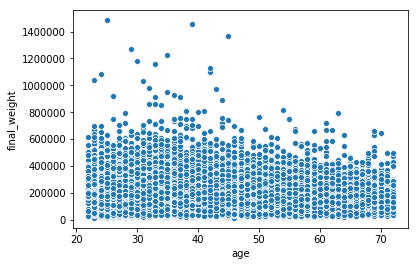

In [54]:
sns.scatterplot(data = adult_eda, x = "age" , y = "final_weight")
plt.show()

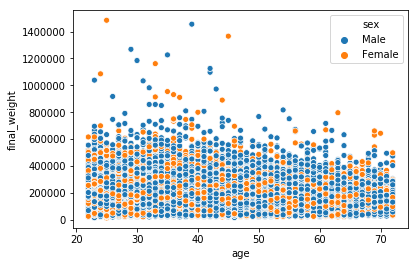

In [55]:
# customize the plot  by coloring the points by same group given by a categorical varaible
sns.scatterplot(data = adult_eda, x = "age" , y = "final_weight", hue = "sex")
plt.show()

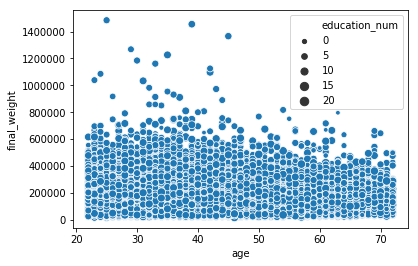

In [56]:
# customize the plot by sizing points different accoring to a third numerical variable
sns.scatterplot(data = adult_eda, x = "age" , y = "final_weight", size = "education_num")
plt.show()

# Bar Charts for Categorical Variables

In [61]:
# to draw a bar chart, we need to count the number of times each value appers in a categorical variable
# the way to do this is to use the groupby function^1

# 1-- answer to worksheet question 4

count_emp = adult.groupby(["type-employer"]).size()
print count_emp

type-employer
?                    1836
Federal-gov           960
Local-gov            2093
Never-worked            7
Private             22696
Self-emp-inc         1116
Self-emp-not-inc     2541
State-gov            1298
Without-pay            14
dtype: int64


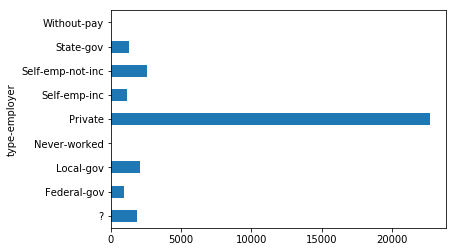

In [62]:
count_emp.plot(kind = "barh")

In futher analysis and model building, we may not want to include levels/values of categorical variables whose bars are too short. We say want to combine them into a single category, e.g. gov/self-emp-Inc. The reason is, it can lead to overlifting.